___

<a href='http://www.pieriandata.com'> <img src='../Pierian_Data_Logo.png' /></a>
___
# Random Forest Project 

For this project we will be exploring publicly available data from [LendingClub.com](www.lendingclub.com). Lending Club connects people who need money (borrowers) with people who have money (investors). Hopefully, as an investor you would want to invest in people who showed a profile of having a high probability of paying you back. We will try to create a model that will help predict this.

Lending club had a [very interesting year in 2016](https://en.wikipedia.org/wiki/Lending_Club#2016), so let's check out some of their data and keep the context in mind. This data is from before they even went public.

We will use lending data from 2007-2010 and be trying to classify and predict whether or not the borrower paid back their loan in full. You can download the data from [here](https://www.lendingclub.com/info/download-data.action) or just use the csv already provided. It's recommended you use the csv provided as it has been cleaned of NA values.

Here are what the columns represent:
* credit.policy: 1 if the customer meets the credit underwriting criteria of LendingClub.com, and 0 otherwise.
* purpose: The purpose of the loan (takes values "credit_card", "debt_consolidation", "educational", "major_purchase", "small_business", and "all_other").
* int.rate: The interest rate of the loan, as a proportion (a rate of 11% would be stored as 0.11). Borrowers judged by LendingClub.com to be more risky are assigned higher interest rates.
* installment: The monthly installments owed by the borrower if the loan is funded.
* log.annual.inc: The natural log of the self-reported annual income of the borrower.
* dti: The debt-to-income ratio of the borrower (amount of debt divided by annual income).
* fico: The FICO credit score of the borrower.
* days.with.cr.line: The number of days the borrower has had a credit line.
* revol.bal: The borrower's revolving balance (amount unpaid at the end of the credit card billing cycle).
* revol.util: The borrower's revolving line utilization rate (the amount of the credit line used relative to total credit available).
* inq.last.6mths: The borrower's number of inquiries by creditors in the last 6 months.
* delinq.2yrs: The number of times the borrower had been 30+ days past due on a payment in the past 2 years.
* pub.rec: The borrower's number of derogatory public records (bankruptcy filings, tax liens, or judgments).

# Import Libraries

**Import the usual libraries for pandas and plotting. You can import sklearn later on.**

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report

In [27]:
from IPython.display import Image  
#from sklearn.externals import StringIO  
from sklearn.tree import export_graphviz
#import pydot 

## Get the Data

** Use pandas to read loan_data.csv as a dataframe called loans.**

In [48]:
loan_data = pd.read_csv('loan_data.csv')

** Check out the info(), head(), and describe() methods on loans.**

In [49]:
loan_data.info()
loan_data.describe()
loan_data['purpose'].value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


purpose
debt_consolidation    3957
all_other             2331
credit_card           1262
home_improvement       629
small_business         619
major_purchase         437
educational            343
Name: count, dtype: int64

# Exploratory Data Analysis

Let's do some data visualization! We'll use seaborn and pandas built-in plotting capabilities, but feel free to use whatever library you want. Don't worry about the colors matching, just worry about getting the main idea of the plot.

** Create a histogram of two FICO distributions on top of each other, one for each credit.policy outcome.**

*Note: This is pretty tricky, feel free to reference the solutions. You'll probably need one line of code for each histogram, I also recommend just using pandas built in .hist()*

Text(0.5, 0, 'FICO')

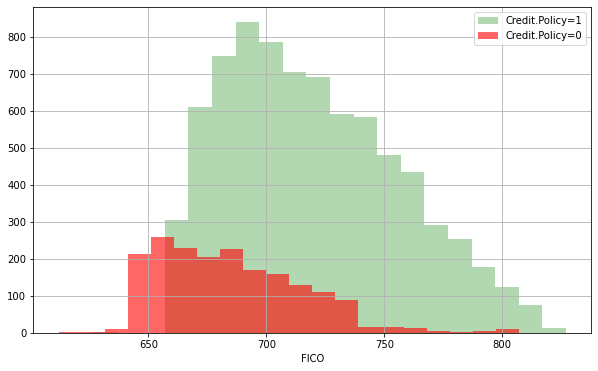

In [50]:
plt.figure(figsize=(10,6))
loan_data[loan_data['credit.policy']==1]['fico'].hist(alpha=0.3,color='green',
                                              bins=20,label='Credit.Policy=1')
loan_data[loan_data['credit.policy']==0]['fico'].hist(alpha=0.6,color='red',
                                              bins=20,label='Credit.Policy=0')
plt.legend()
plt.xlabel('FICO')

** Create a similar figure, except this time select by the not.fully.paid column.**

Text(0.5, 0, 'FICO')

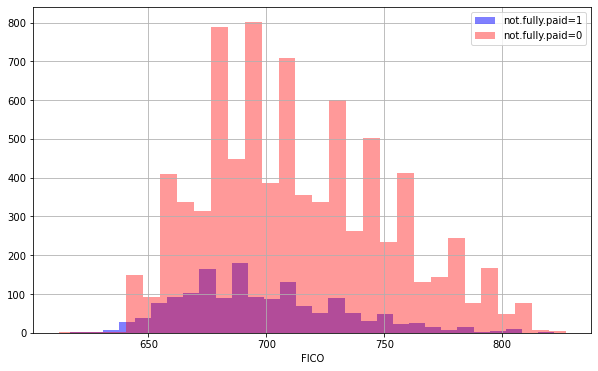

In [51]:
plt.figure(figsize=(10,6))
loan_data[loan_data['not.fully.paid']==1]['fico'].hist(alpha=0.5,color='blue',
                                              bins=30,label='not.fully.paid=1')
loan_data[loan_data['not.fully.paid']==0]['fico'].hist(alpha=0.4,color='red',
                                              bins=30,label='not.fully.paid=0')
plt.legend()
plt.xlabel('FICO')

** Create a countplot using seaborn showing the counts of loans by purpose, with the color hue defined by not.fully.paid. **

<AxesSubplot: xlabel='purpose', ylabel='count'>

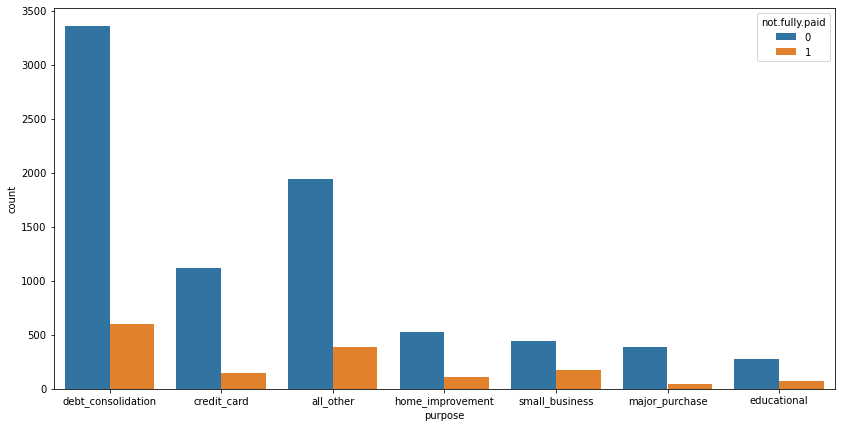

In [52]:
plt.figure(figsize=(14,7))
sns.countplot(data = loan_data, x = 'purpose', hue='not.fully.paid')

** Let's see the trend between FICO score and interest rate. Recreate the following jointplot.**

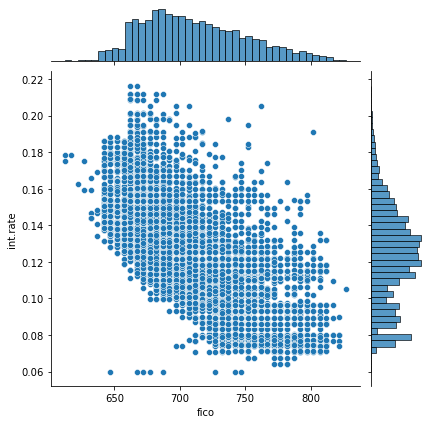

In [53]:
sns.jointplot(data = loan_data, x ='fico', y = 'int.rate' )

** Create the following lmplots to see if the trend differed between not.fully.paid and credit.policy. Check the documentation for lmplot() if you can't figure out how to separate it into columns.**

<Figure size 720x576 with 0 Axes>

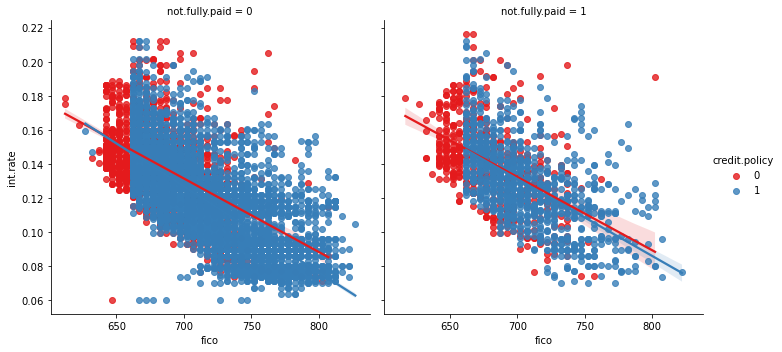

In [54]:
plt.figure(figsize=(10,8))
sns.lmplot(y='int.rate',x='fico',data=loan_data,hue='credit.policy',
           col='not.fully.paid',palette='Set1')

# Setting up the Data

Let's get ready to set up our data for our Random Forest Classification Model!

**Check loans.info() again.**

In [55]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


## Categorical Features

Notice that the **purpose** column as categorical

That means we need to transform them using dummy variables so sklearn will be able to understand them. Let's do this in one clean step using pd.get_dummies.

Let's show you a way of dealing with these columns that can be expanded to multiple categorical features if necessary.

**Create a fixed larger dataframe that has new feature columns with dummy variables. Set this dataframe as final_data.**

In [56]:
final_data = pd.get_dummies(loan_data, columns=['purpose'], drop_first=True)

## Train Test Split

Now its time to split our data into a training set and a testing set!

** Use sklearn to split your data into a training set and a testing set as we've done in the past.**

In [57]:
X = final_data.drop(columns='not.fully.paid')
y  = final_data['not.fully.paid']
X_train, X_test, y_train,  y_test = train_test_split(X, y, test_size=0.3, random_state=101)


## Training a Decision Tree Model

Let's start by training a single decision tree first!

**Create an instance of DecisionTreeClassifier() called dtree and fit it to the training data.**

In [58]:
classifier1 = DecisionTreeClassifier(max_depth=3)
classifier1.fit(X_train, y_train)
y_predicted1 = classifier1.predict(X_test)
print(confusion_matrix(y_test, y_predicted1))
print(classification_report(y_test, y_predicted1))

[[2424    7]
 [ 442    1]]
              precision    recall  f1-score   support

           0       0.85      1.00      0.92      2431
           1       0.12      0.00      0.00       443

    accuracy                           0.84      2874
   macro avg       0.49      0.50      0.46      2874
weighted avg       0.73      0.84      0.77      2874



In [59]:
from sklearn.tree import export_text
r = export_text(classifier1)
print(r)

|--- feature_0 <= 0.50
|   |--- feature_2 <= 349.93
|   |   |--- feature_9 <= 6.50
|   |   |   |--- class: 0
|   |   |--- feature_9 >  6.50
|   |   |   |--- class: 0
|   |--- feature_2 >  349.93
|   |   |--- feature_3 <= 10.38
|   |   |   |--- class: 1
|   |   |--- feature_3 >  10.38
|   |   |   |--- class: 0
|--- feature_0 >  0.50
|   |--- feature_1 <= 0.09
|   |   |--- feature_7 <= 109752.00
|   |   |   |--- class: 0
|   |   |--- feature_7 >  109752.00
|   |   |   |--- class: 1
|   |--- feature_1 >  0.09
|   |   |--- feature_17 <= 0.50
|   |   |   |--- class: 0
|   |   |--- feature_17 >  0.50
|   |   |   |--- class: 0



## Training the Random Forest model

Now its time to train our model!

**Create an instance of the RandomForestClassifier class and fit it to our training data from the previous step.**

In [60]:
forest2 = RandomForestClassifier(n_estimators=500)
forest2.fit(X_train, y_train)
y_predicted2 = forest2.predict(X_test)
print(confusion_matrix(y_test, y_predicted2))
print(classification_report(y_test, y_predicted2))

[[2422    9]
 [ 435    8]]
              precision    recall  f1-score   support

           0       0.85      1.00      0.92      2431
           1       0.47      0.02      0.03       443

    accuracy                           0.85      2874
   macro avg       0.66      0.51      0.48      2874
weighted avg       0.79      0.85      0.78      2874



# Great Job!